In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%config InlineBackend.figure_format = 'retina' # much faster than svg when generating lots of points
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as sa
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

# set print precision
np.set_printoptions(precision=5, suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# matplotlib style
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-notebook')

In [21]:
# load train data to build model
df_initial = pd.read_csv('data/data_initial.csv')
print(df_initial.dtypes)
df = pd.read_csv('data/train.csv')
df = df.drop(columns='type')

df.dtypes



category                 object
rating                  float64
reviews                   int64
installs                  int64
type                     object
price                   float64
content_rating           object
app_size                float64
last_updated_encoded      int64
dtype: object


category                 object
rating                  float64
reviews                 float64
installs                float64
price                   float64
content_rating           object
app_size                float64
last_updated_encoded      int64
dtype: object

# numerical variables

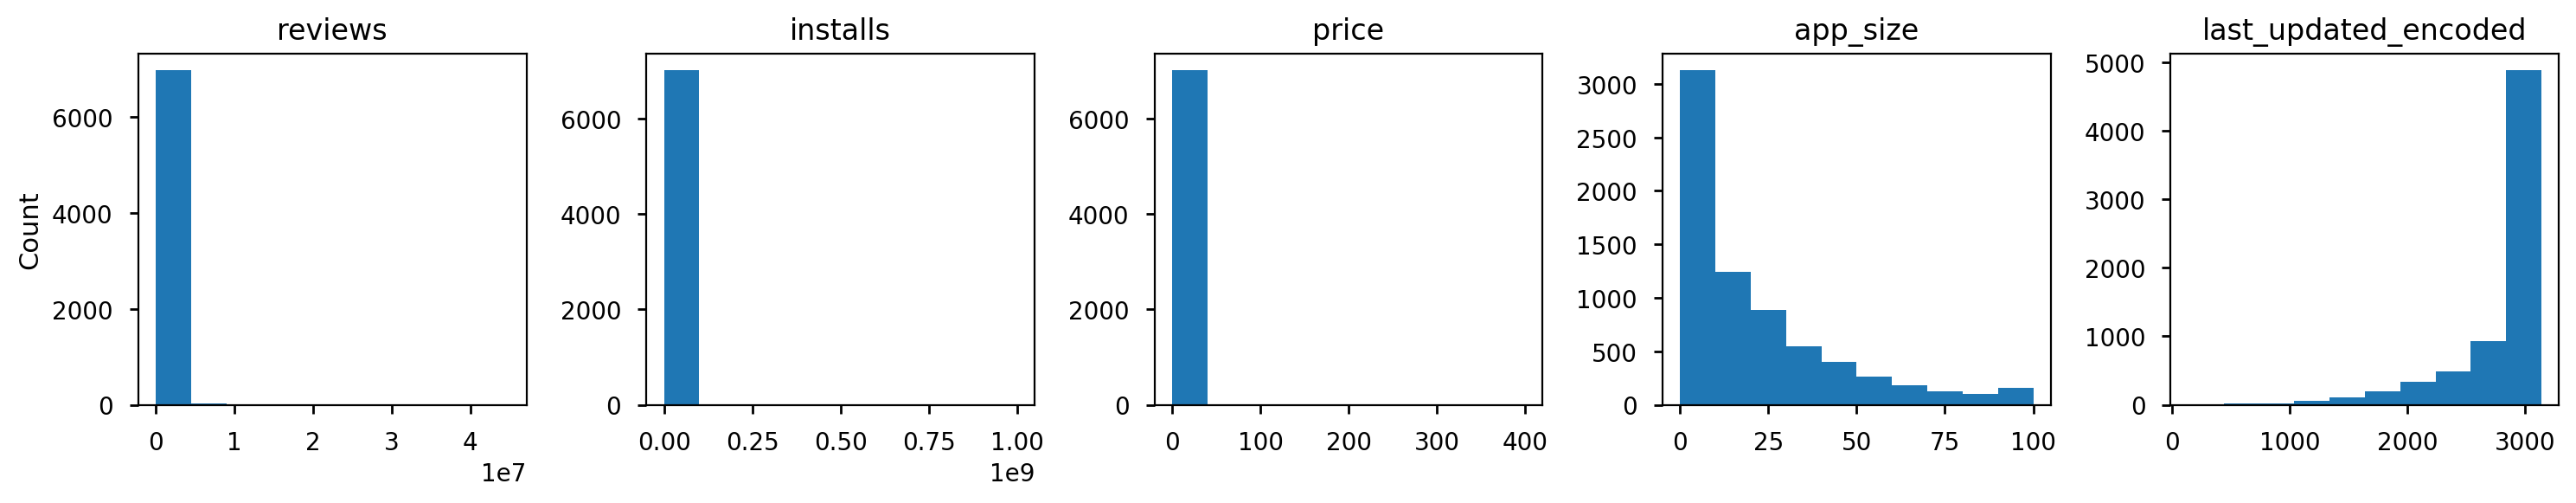

In [19]:
# initial numeric variables
numeric_vars = df_initial.select_dtypes(np.number)
x_numeric_vars = numeric_vars.drop(columns='rating')

fig, axes = plt.subplots(nrows=1, ncols=len(x_numeric_vars.columns), figsize = (15,3) )
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    data = x_numeric_vars
    ax.hist(data.iloc[:, i])
    ax.set_title(data.columns[i])
axes[0].set_ylabel('Count')
    
plt.tight_layout()
plt.show()

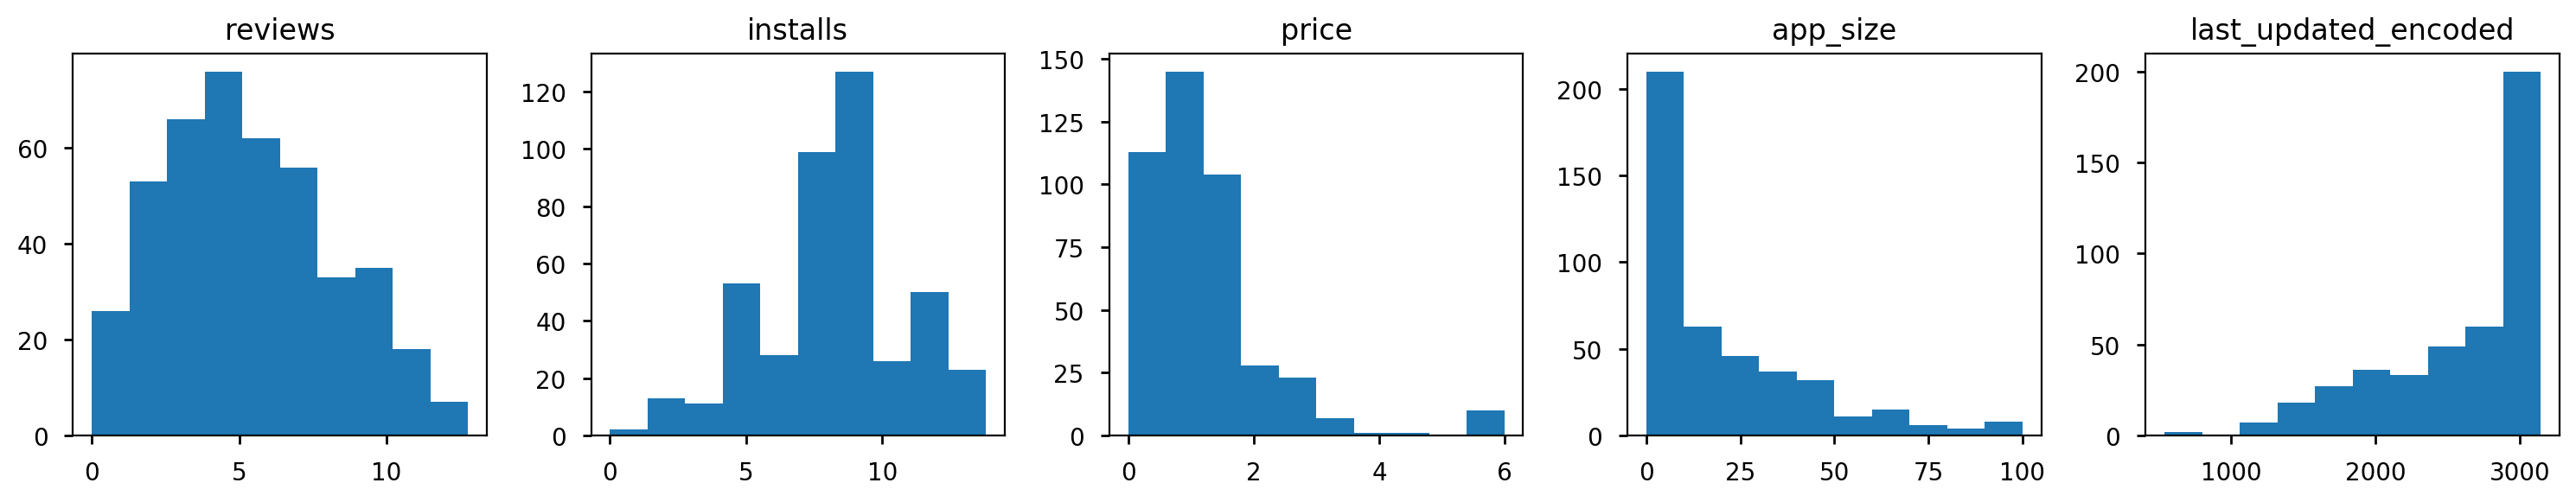

In [20]:
# log numeric variables
numeric_vars = df.select_dtypes(np.number)
x_numeric_vars = numeric_vars.drop(columns='rating')

fig, axes = plt.subplots(nrows=1, ncols=len(x_numeric_vars.columns), figsize = (15,3) )
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    data = x_numeric_vars
    ax.hist(data.iloc[:, i])
    ax.set_title(data.columns[i])
    
plt.tight_layout()
plt.show()

# categorical variables

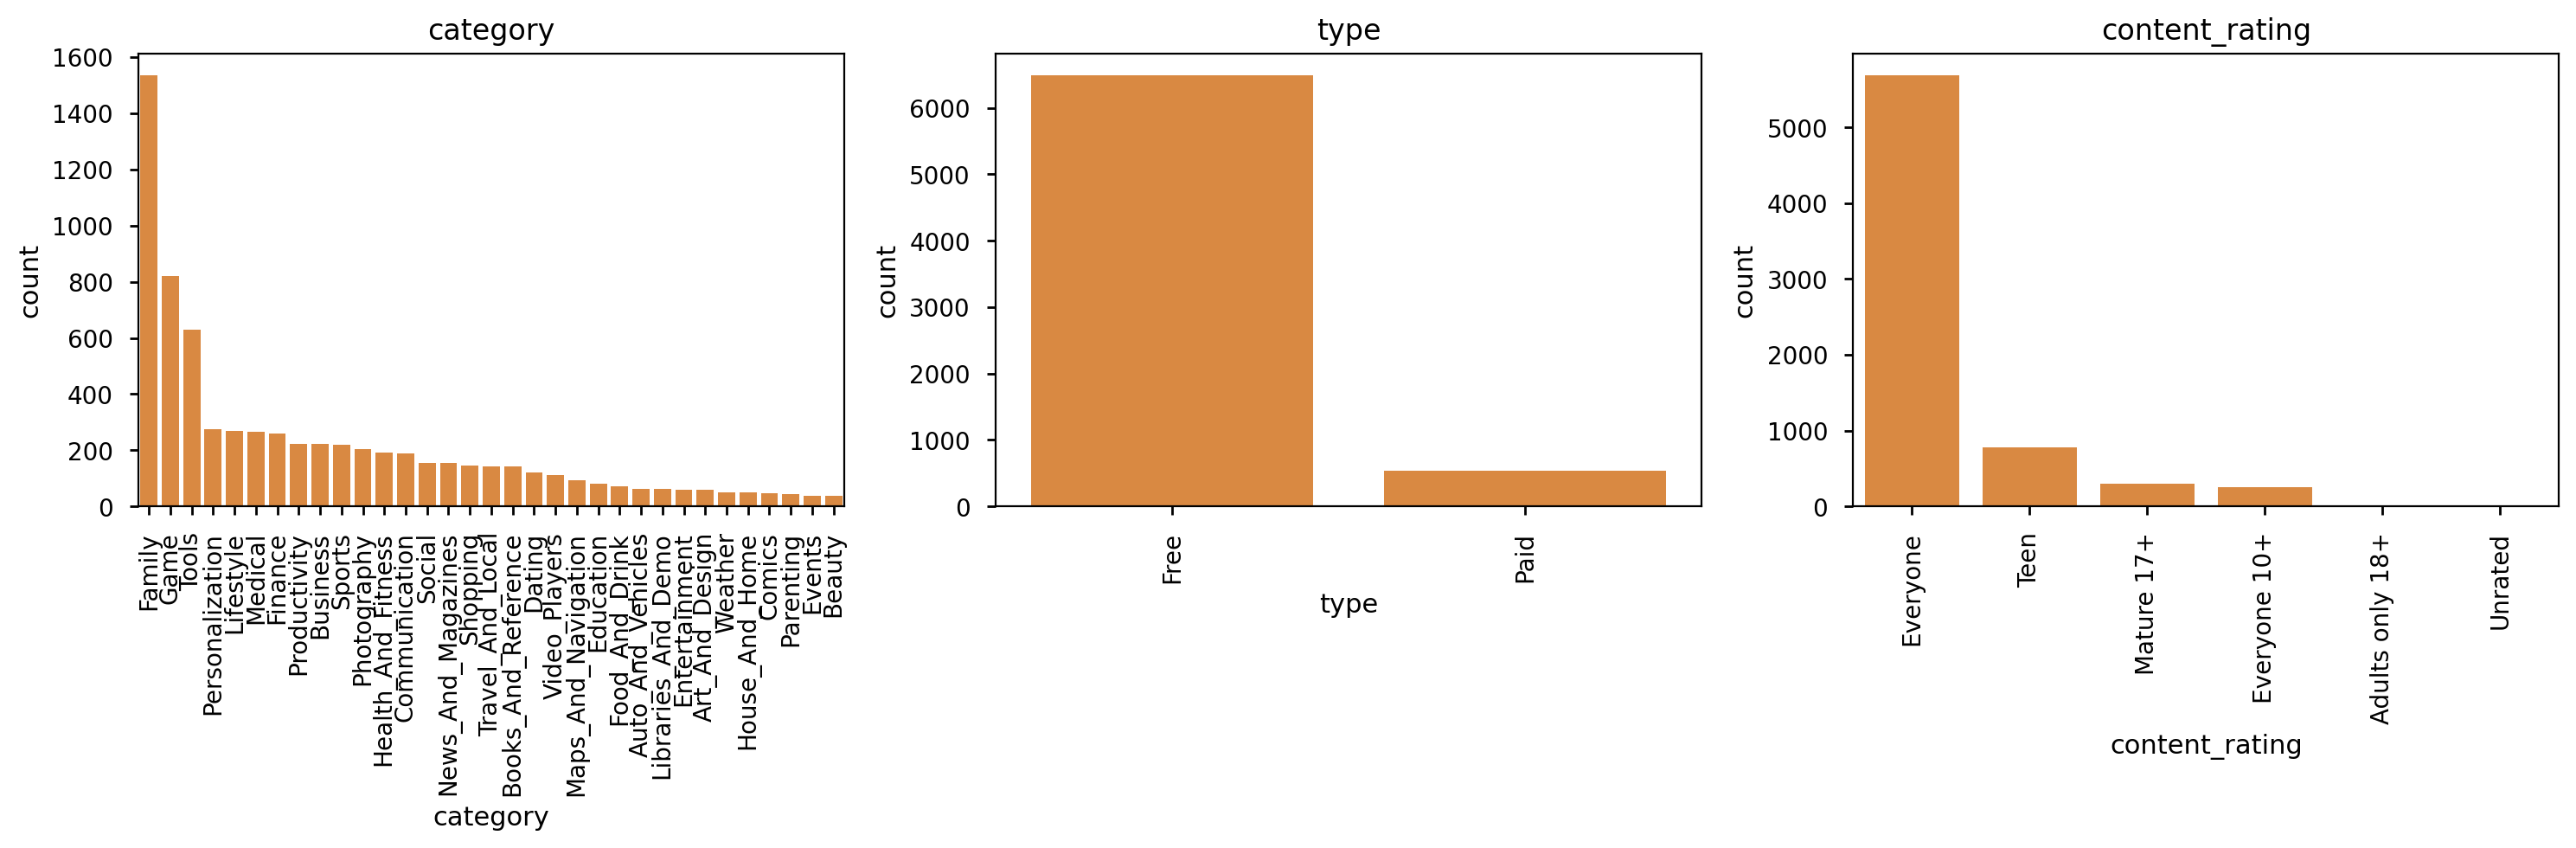

In [17]:
# categorical variables initial

cat_vars = df_initial.select_dtypes('object')

fig, axes = plt.subplots(nrows=1, ncols=len(cat_vars.columns), figsize = (15,5) )
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    data = cat_vars
    sns.countplot(data.iloc[:, i], 
                  order=cat_vars.iloc[:, i].value_counts().index, 
                  ax=ax, color='#f28729')
        
    ax.set_title(data.columns[i])
    ax.tick_params(axis='x',labelrotation=90)
    
plt.tight_layout()
plt.show()
                  

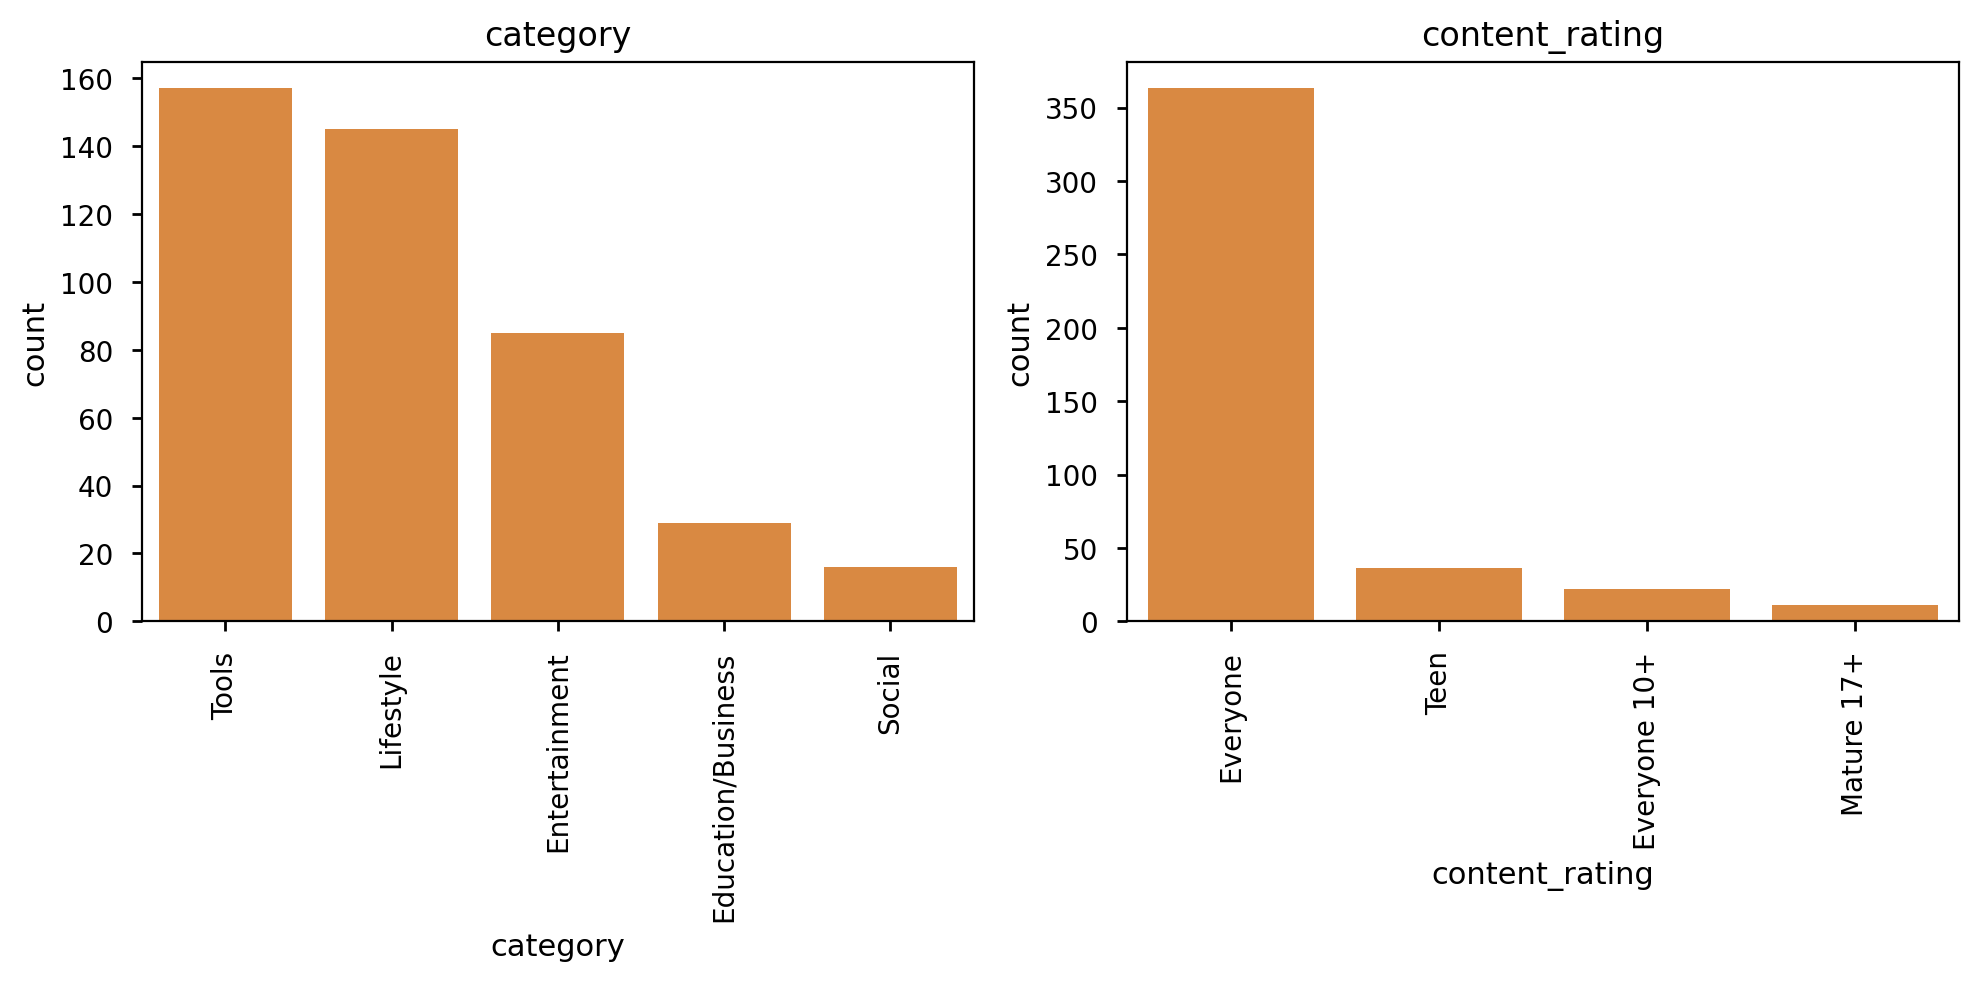

In [16]:
# categorical variables transformed

cat_vars = df.select_dtypes('object')

fig, axes = plt.subplots(nrows=1, ncols=len(cat_vars.columns), figsize = (10,5)) 
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    data = cat_vars
    sns.countplot(data.iloc[:, i], order = cat_vars.iloc[:, i].value_counts().index, ax=ax, color='#f28729')
    ax.set_title(data.columns[i])
    ax.tick_params(axis='x',labelrotation=90)
    
plt.tight_layout()
plt.show()

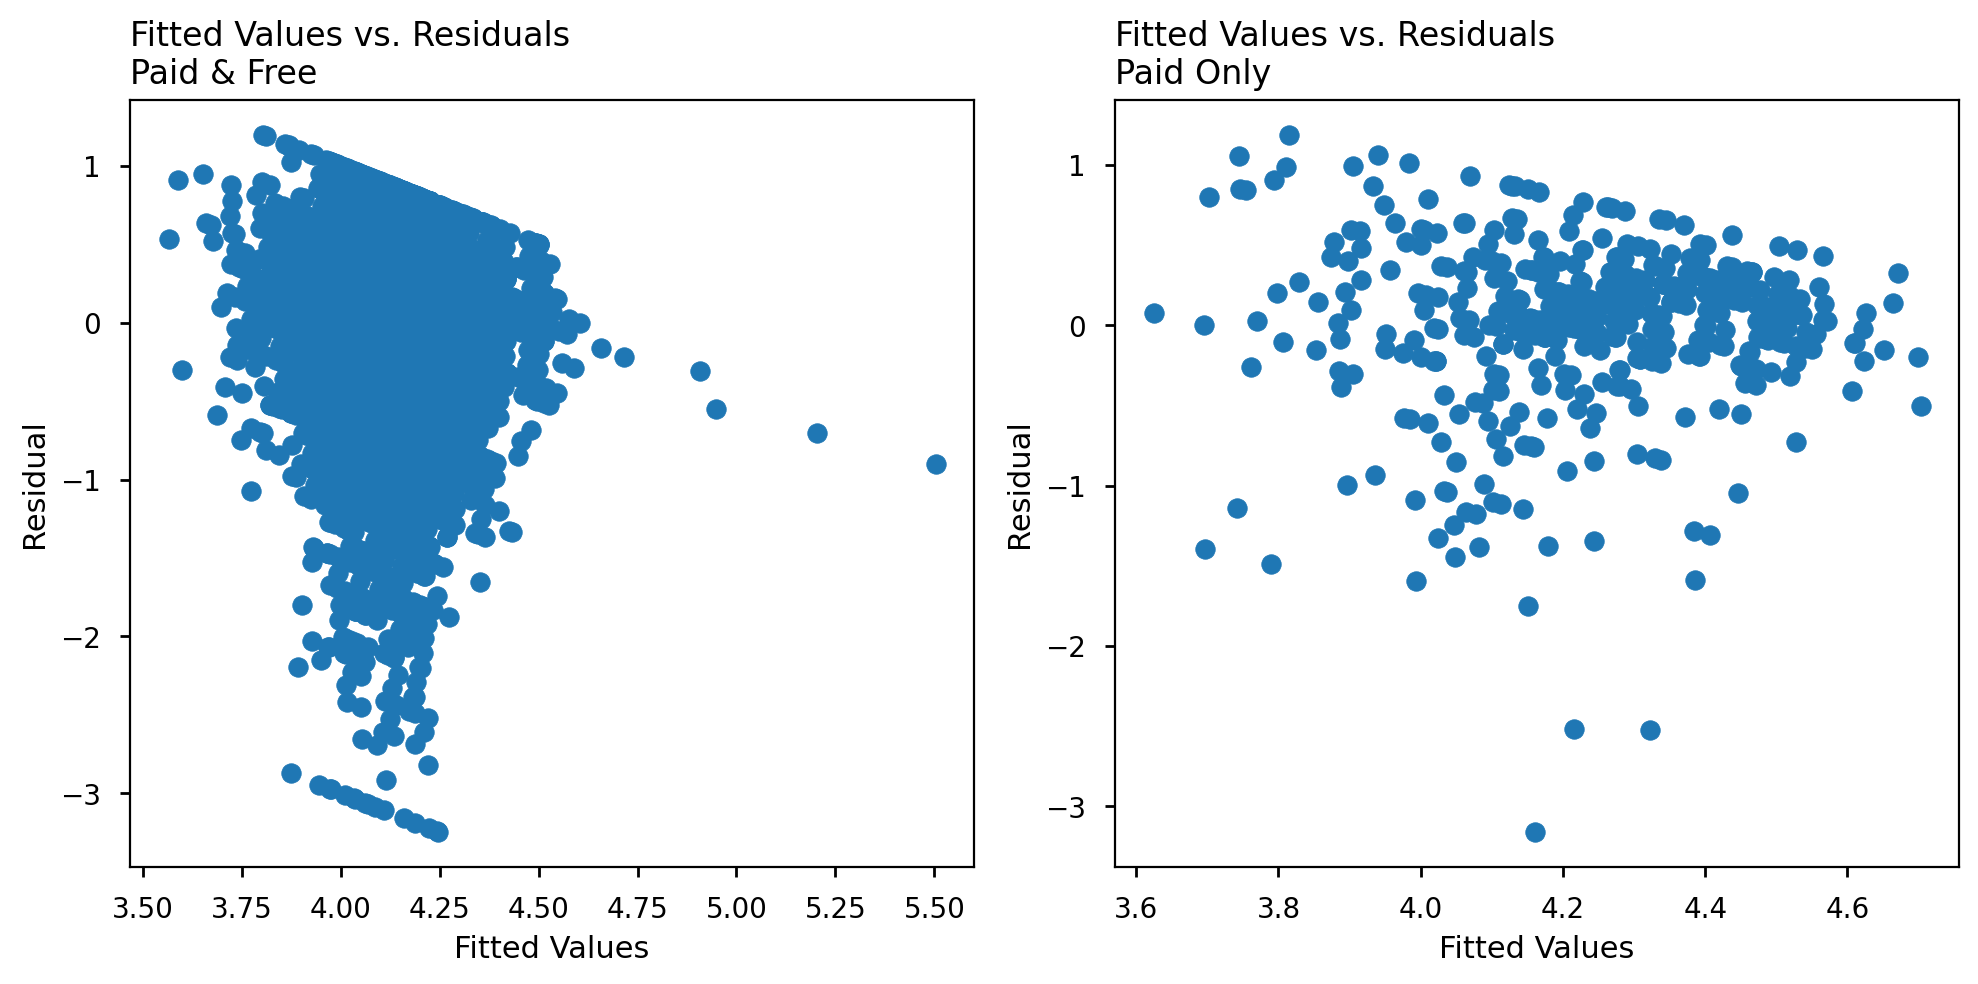

In [111]:
# Initial model
ystr_init = 'rating'
x_var_init = [col for col in df_initial.columns if col != ystr_init]
xstr_init = '+'.join(x_var_init)
model_initial = smf.ols(f'{ystr_init}~{xstr_init}', data=df_initial).fit()

ystr = 'rating'
x_var = [col for col in df.columns if col != ystr]
xstr = '+'.join(x_var)
model = smf.ols(f'{ystr}~{xstr}', data=df).fit()

models = [model_initial, model]

fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize = (10,5)) 
axes = np.array(axes).flatten()
titles = ["Fitted Values vs. Residuals\nPaid & Free", "Fitted Values vs. Residuals\nPaid Only"]

for i, ax in enumerate(axes):
    data = models
    ax.scatter(data[i].fittedvalues, data[i].resid)
    ax.set_xlabel("Fitted Values")
    ax.set_ylabel("Residual")
    ax.set_title(titles[i], loc='left')


plt.tight_layout()
plt.show()


# linearity tests

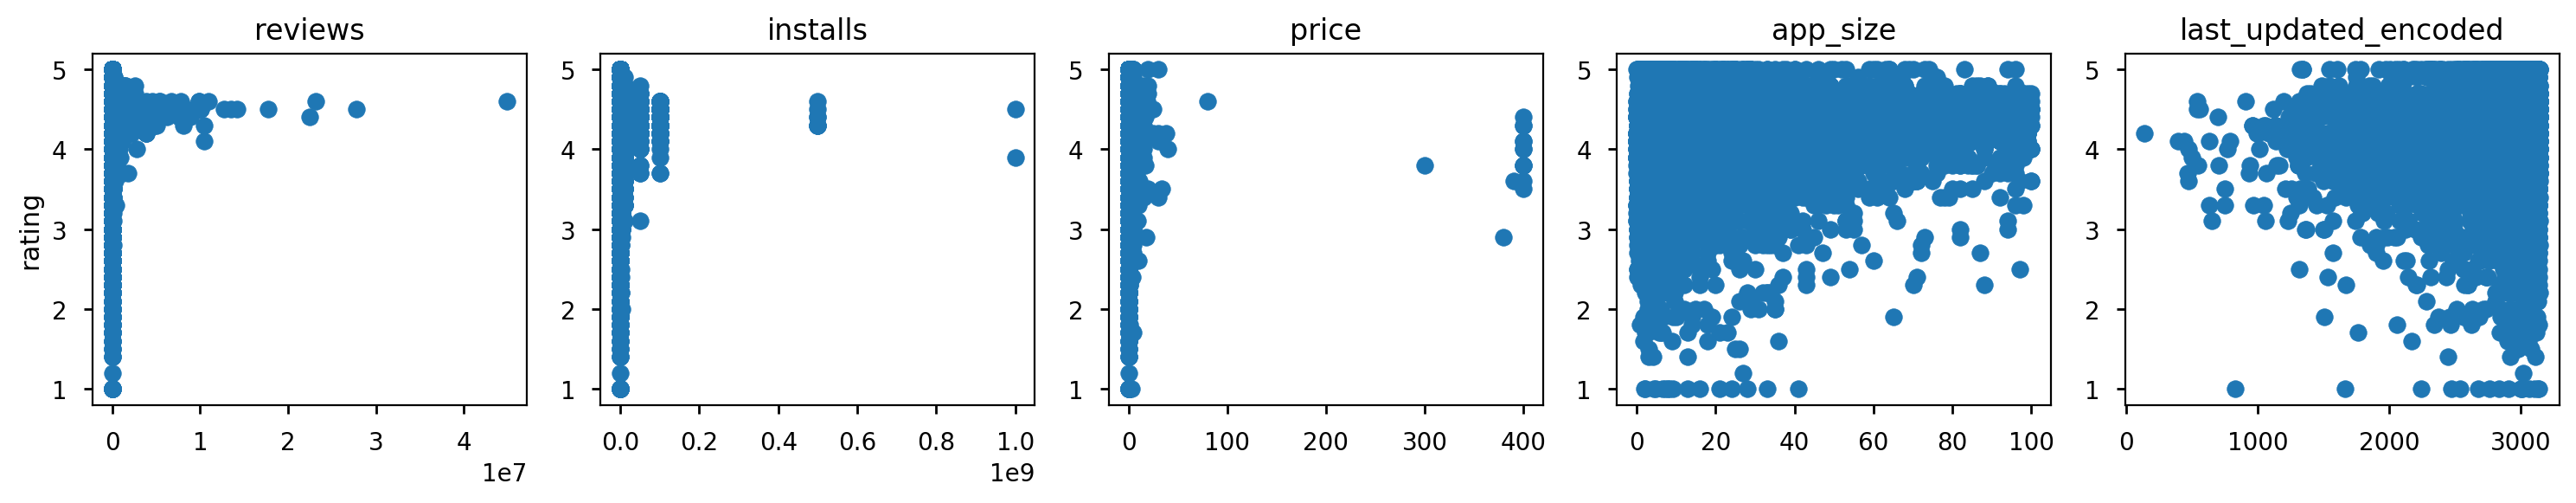

In [44]:
numeric_vars = df_initial.select_dtypes(np.number)
x_numeric_vars = numeric_vars.drop(columns='rating')


fig, axes = plt.subplots(nrows=1, ncols=len(x_numeric_vars.columns),  figsize = (15,3)  )
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    data = x_numeric_vars
    ax.scatter(x_numeric_vars.iloc[:, i],df_initial.rating)
    ax.set_title(x_numeric_vars.columns[i])

axes[0].set_ylabel('rating')
plt.tight_layout()
plt.show()

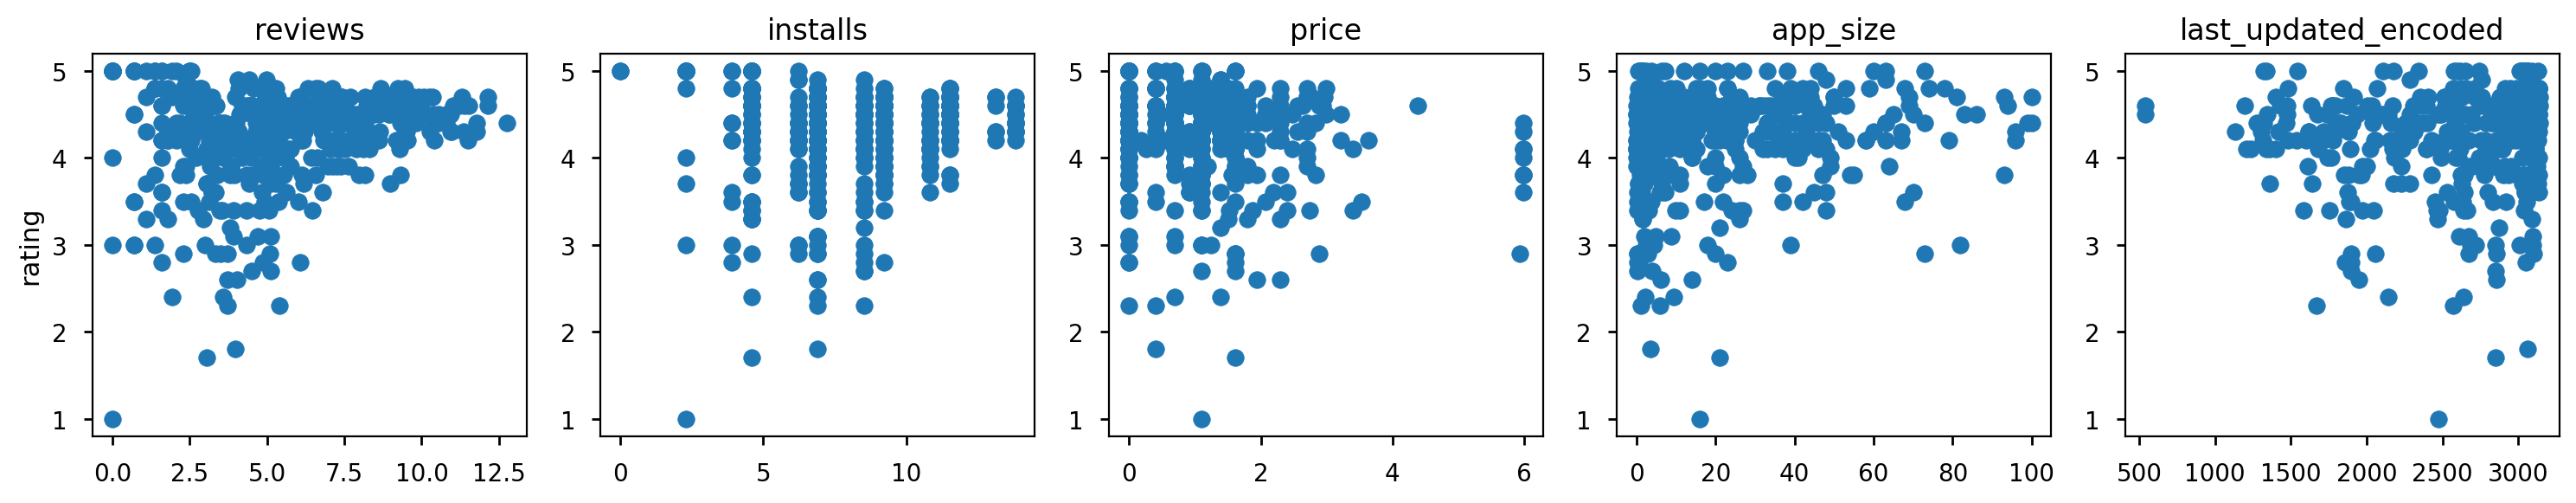

In [45]:
numeric_vars = df.select_dtypes(np.number)
x_numeric_vars = numeric_vars.drop(columns='rating')

fig, axes = plt.subplots(nrows=1, ncols=len(x_numeric_vars.columns),  figsize = (15,3)  )
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    data = x_numeric_vars
    ax.scatter(x_numeric_vars.iloc[:, i],df.rating)
    ax.set_title(x_numeric_vars.columns[i])

axes[0].set_ylabel('rating')
plt.tight_layout()
plt.show()

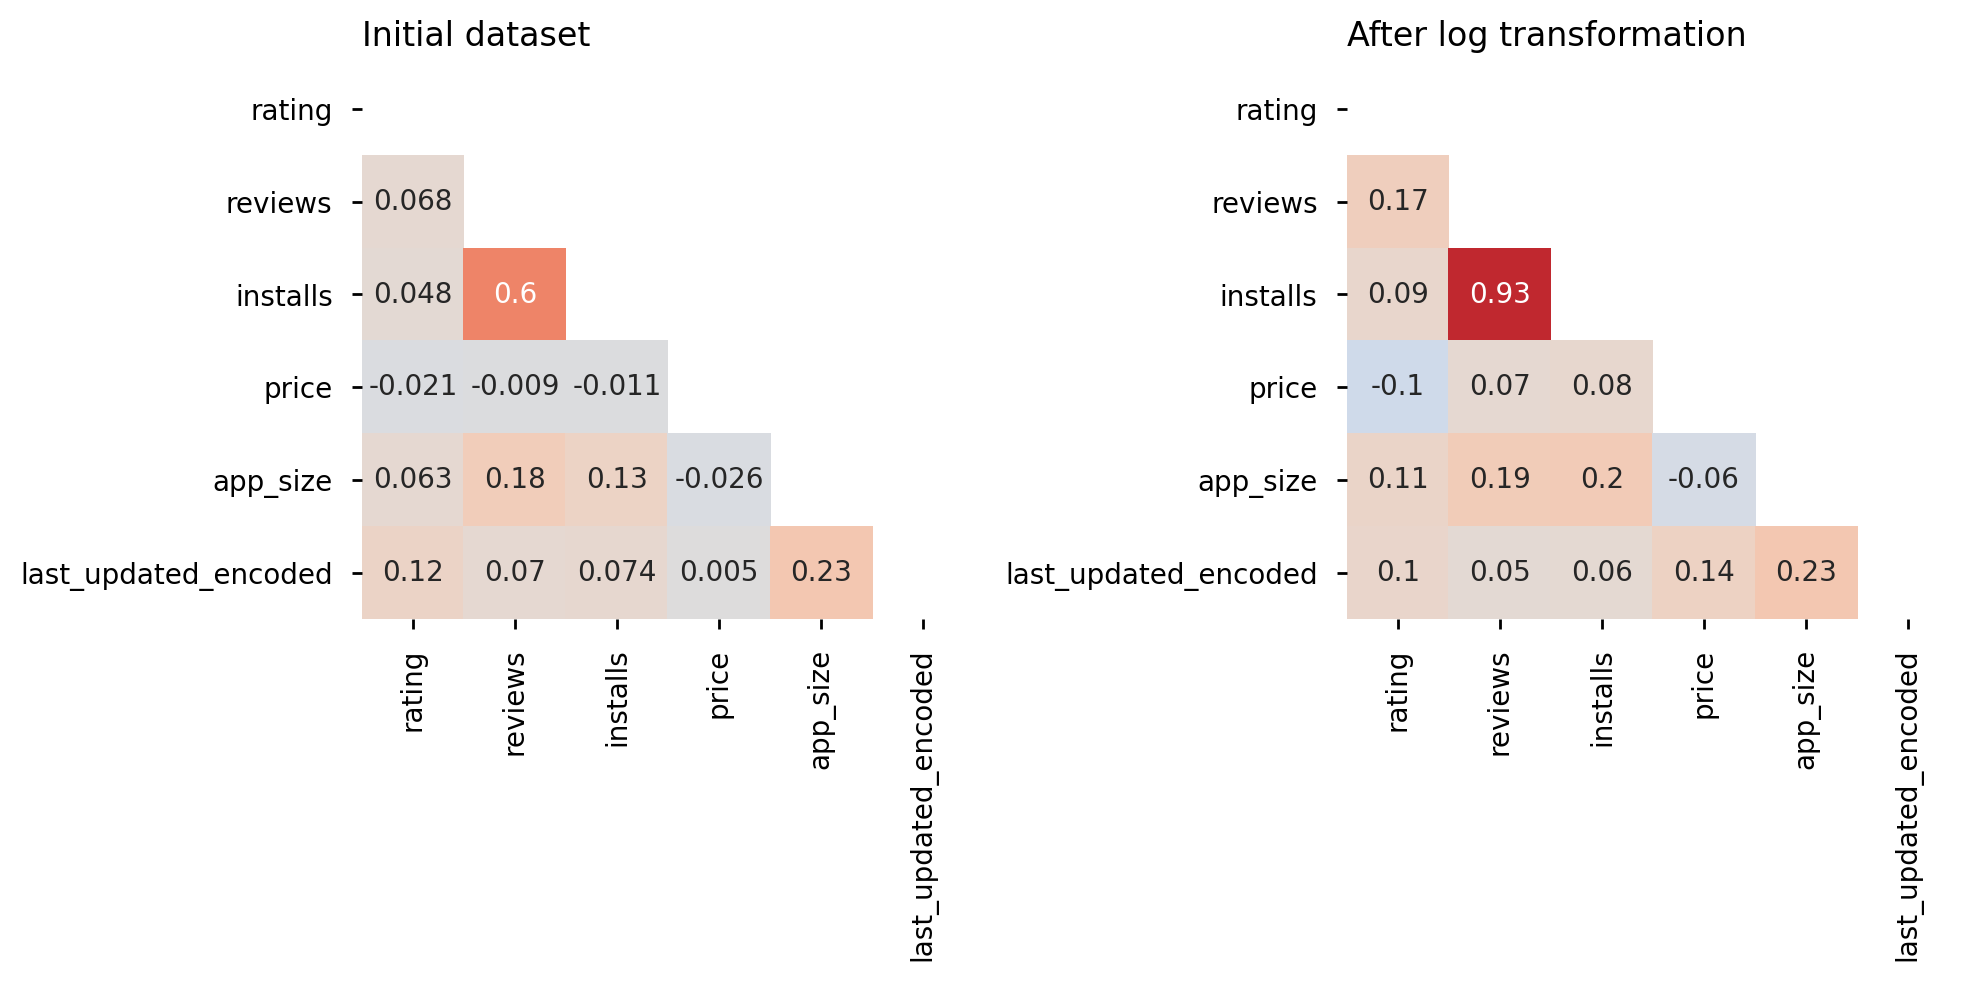

In [106]:

corr = [df_initial.corr().round(3), df.corr().round(2)]
titles = ['Initial dataset', 'After log transformation']
fig, axes = plt.subplots(nrows=1, ncols=len(corr), figsize = (10,5)) 
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    data = corr
    mask = np.triu(np.ones_like(corr[i], dtype=bool))
    sns.heatmap(data=corr[i], mask=mask, annot=True,vmin=-1, vmax=1, 
                center=0, cmap= 'coolwarm',ax=ax, 
                cbar=0,
               )
    ax.set_title(titles[i],loc='left')
    ax.tick_params(axis='y',labelrotation=0)


plt.tight_layout()
plt.show()


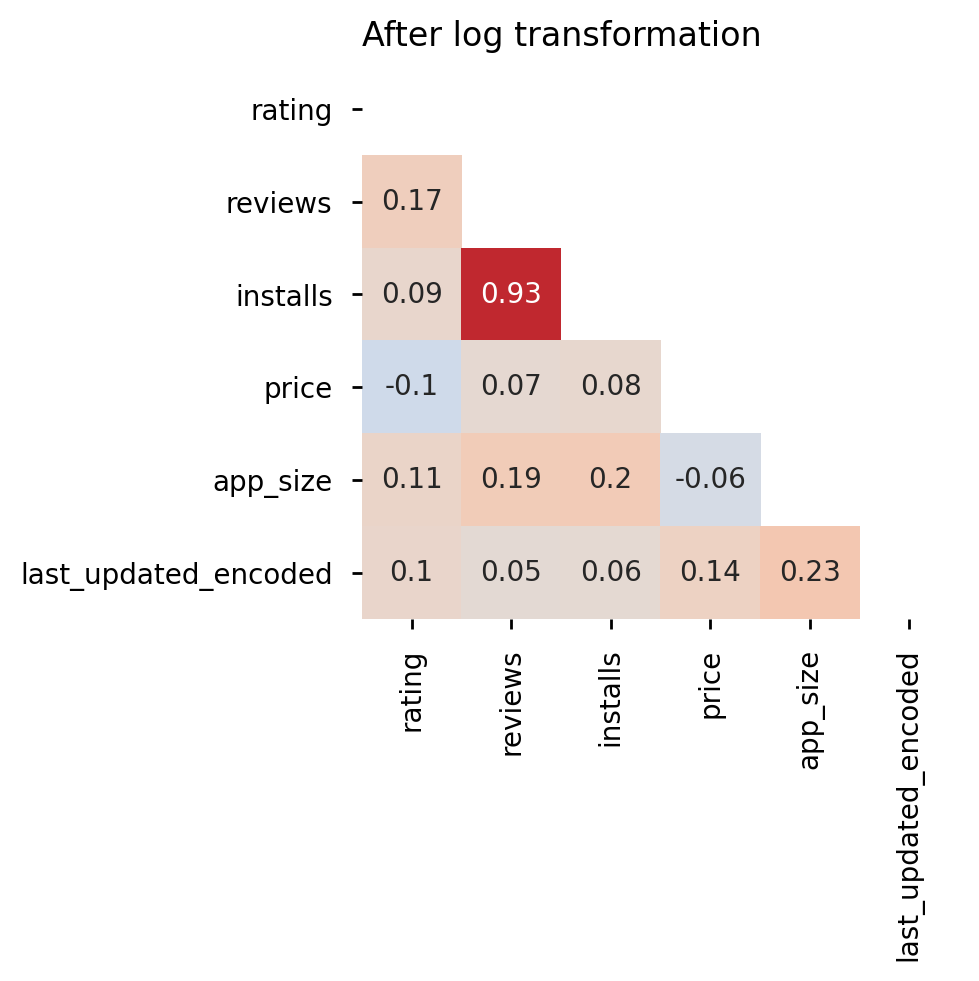

In [113]:

corr = [df.corr().round(2)]
titles = ['After log transformation']
fig, axes = plt.subplots(nrows=1, ncols=len(corr), figsize = (5,5)) 
axes = np.array(axes).flatten()

for i, ax in enumerate(axes):
    data = corr
    mask = np.triu(np.ones_like(corr[i], dtype=bool))
    sns.heatmap(data=corr[i], mask=mask, annot=True,vmin=-1, vmax=1, 
                center=0, cmap= 'coolwarm',ax=ax, 
                cbar=0,
               )
    ax.set_title(titles[i],loc='left')
    ax.tick_params(axis='y',labelrotation=0)


plt.tight_layout()
plt.show()

